# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [311]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [312]:
# Memuat Dataset
clustering_df = pd.read_csv(r"Student-Performance-Factors.csv")
clustering_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [313]:
# Melihat kolom apa saja yang ada di dataset
clustering_df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

**Conclusion:**

Dataset ini memiliki :
- Baris : 6.607
- Kolom : 20

Penjelasan kolom:
1. Hours_Studied : Jumlah jam yang dihabiskan untuk belajar per minggu.
2. Attendance : Persentase kelas yang dihadiri oleh siswa.
3. Parental_Involvement : Tingkat keterlibatan orang tua dalam pendidikan siswa (Rendah, Sedang, Tinggi).
4. Access_to_Resources : Ketersediaan sumber daya pendidikan (Rendah, Sedang, Tinggi).
5. Extracurricular_Activities : Partisipasi dalam kegiatan ekstrakurikuler (Ya, Tidak).
6. Sleep_Hours : Rata-rata jumlah jam tidur per malam.
7. Previous_Scores : Nilai ujian sebelumnya.
8. Motivation_Level	:  Tingkat motivasi siswa (Rendah, Sedang, Tinggi).
9. Internet_Access : Ketersediaan akses internet (Ya, Tidak).
10. Tutoring_Sessions : Jumlah sesi bimbingan belajar yang dihadiri per bulan.
11. Family_Income : Tingkat pendapatan keluarga (Rendah, Sedang, Tinggi).
12. Teacher_Quality : Kualitas pengajaran guru (Rendah, Sedang, Tinggi).
13. School_Type	: Jenis sekolah yang dihadiri (Negeri, Swasta).
14. Peer_Influence : Pengaruh teman sebaya terhadap prestasi akademik (Positif, Netral, Negatif).
15. Physical_Activity : Rata-rata jumlah jam aktivitas fisik per minggu.
16. Learning_Disabilities : Keberadaan kesulitan belajar (Ya, Tidak).
17. Parental_Education_Level : Tingkat pendidikan tertinggi orang tua (SMA, Perguruan Tinggi, Pascasarjana).
18. Distance_from_Home : Jarak dari rumah ke sekolah (Dekat, Sedang, Jauh).
19. Gender: Jenis kelamin siswa (Laki-laki, Perempuan).
20. Exam_Score: Nilai akhir ujian siswa.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **1. Memahami Struktur Data**

In [314]:
# Meninjau jumlah baris dan kolom dalam dataset
clustering_df.shape

(6607, 20)

In [315]:
# Meninjau jenis data di setiap kolom (numerikal atau kategorikal)
clustering_df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

Dari output di atas, berikut adalah klasifikasi kolom berdasarkan jenis data:
##### Kolom Numerikal (int64)
- Hours_Studied
- Attendance
- Sleep_Hours
- Previous_Scores
- Tutoring_Sessions
- Physical_Activity
- Exam_Score <br>
Total = 7

##### Kolom Kategorikal (object)
- Parental_Involvement
- Access_to_Resources
- Extracurricular_Activities
- Motivation_Level
- Internet_Access
- Family_Income
- Teacher_Quality
- School_Type
- Peer_Influence
- Learning_Disabilities
- Parental_Education_Level
- Distance_from_Home
- Gender <br>
Total = 13

### **2. Menangani Missing Values (Data yang Hilang)**

Kita akan memeriksa missing values dalam dataset, yang bertujuan untuk mencegah kesalahan ketika melakukan analisis, mencegah error pada model, dan meningkatkan performa model

In [316]:
# Cek jumlah missing values per kolom
missing_values = clustering_df.isnull().sum()
missing_values

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Dari hasil pengecekan, ditemukan bahwa 3 kolom memiliki missing values, yaitu :

- Teacher_Quality : 78
- Parental_Education_Level : 90
- Distance_from_Home : 67

Sementara itu, 17 kolom lainnya tidak memiliki missing values sama sekali. Selanjutnya, kita akan menentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

Sebelum menentukan langkah terbaik untuk menangani missing values, kita bisa melihat berapa persen data yang hilang dari total baris.

In [317]:
# Total data
total_rows = len(clustering_df)

# Hitung persentase missing values per kolom
md = (clustering_df.isnull().sum() / total_rows) * 100
print(md[md > 0])

Teacher_Quality             1.180566
Parental_Education_Level    1.362192
Distance_from_Home          1.014076
dtype: float64


**Interpretasi :**
- Semua persentase dibawah 2%, yang berarti **jumlah data yang hilang sangat kecil**.
- Karena pengaruhnya terhadap distribusi data sangat kecil, **Imputasi (Pengisian)** sangat memungkinkan kita gunakan sebagai langkah terbaik menangani missing values.

### **3. Analisis Distribusi dan Korelasi**

In [318]:
# Analisis distribusi variabel numerik dengan statistik deskriptif
numerik_cols = clustering_df.select_dtypes(include='number').columns
clustering_df[numerik_cols].describe().round(2)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.00,6607.00,6607.00,6607.00,6607.00,6607.00,6607.00
mean,19.98,79.98,7.03,75.07,1.49,2.97,67.24
std,5.99,11.55,1.47,14.40,1.23,1.03,3.89
min,1.00,60.00,4.00,50.00,0.00,0.00,55.00
25%,16.00,70.00,6.00,63.00,1.00,2.00,65.00
50%,20.00,80.00,7.00,75.00,1.00,3.00,67.00
75%,24.00,90.00,8.00,88.00,2.00,4.00,69.00
max,44.00,100.00,10.00,100.00,8.00,6.00,101.00


**Insight Awal:**
- Distribusi sebagian besar simetris (mean ≈ median), yang berarti data relatif normal

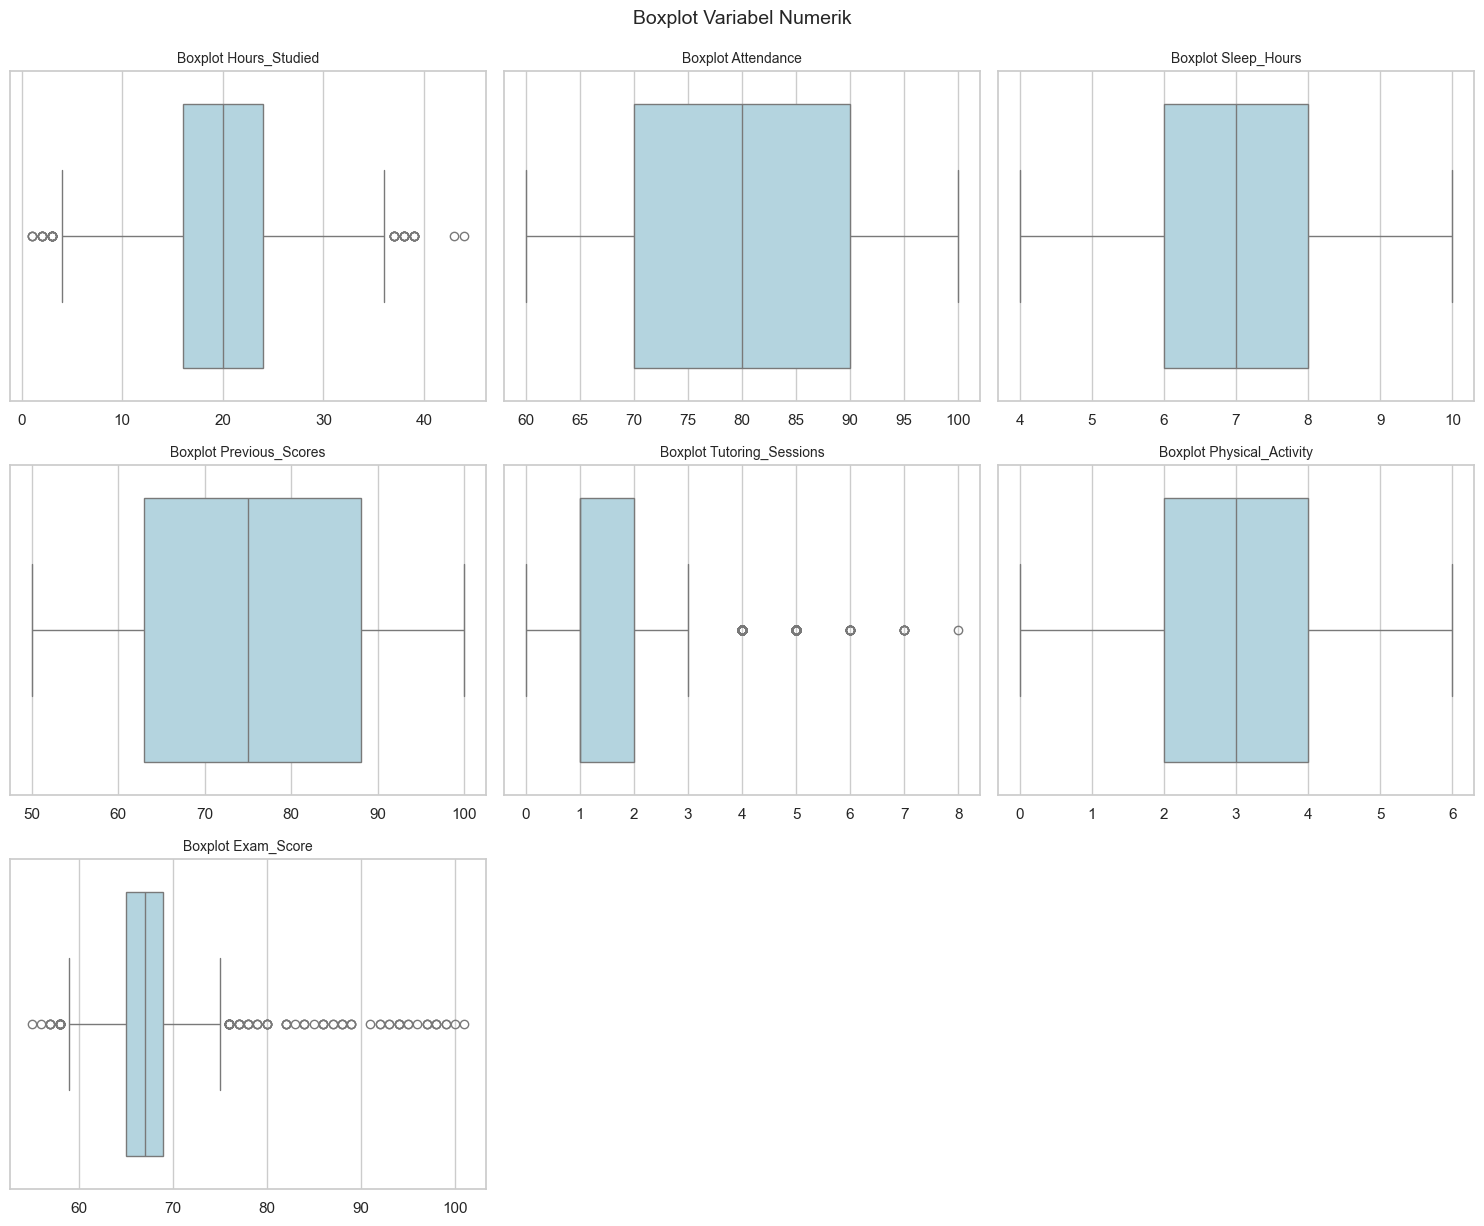

In [319]:
# Analisis distribusi variabel numerik dengan visualisasi
# List variabel numerik
numerik_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 
                'Previous_Scores', 'Tutoring_Sessions', 
                'Physical_Activity', 'Exam_Score']

plt.figure(figsize=(15, 12))
sns.set(style="whitegrid")

for i, col in enumerate(numerik_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=clustering_df, x=col, color='lightblue')
    plt.title(f'Boxplot {col}', fontsize=10)
    plt.xlabel('')

plt.tight_layout()
plt.suptitle("Boxplot Variabel Numerik", fontsize=14, y=1.02)
plt.show()

**Insight:**
- Variabel seperti Tutoring_Sessions, Hours_Studied, dan Exam_Score memiliki outlier, yang artinya ada siswa dengan karakteristik ekstrem.
- Variabel seperti Attendance, Sleep_Hours, Previous_Score, dan Physical_Activity terlihat **relatif stabil dan normal**, tanpa variasi yang besar atau masalah signifikan dengan data

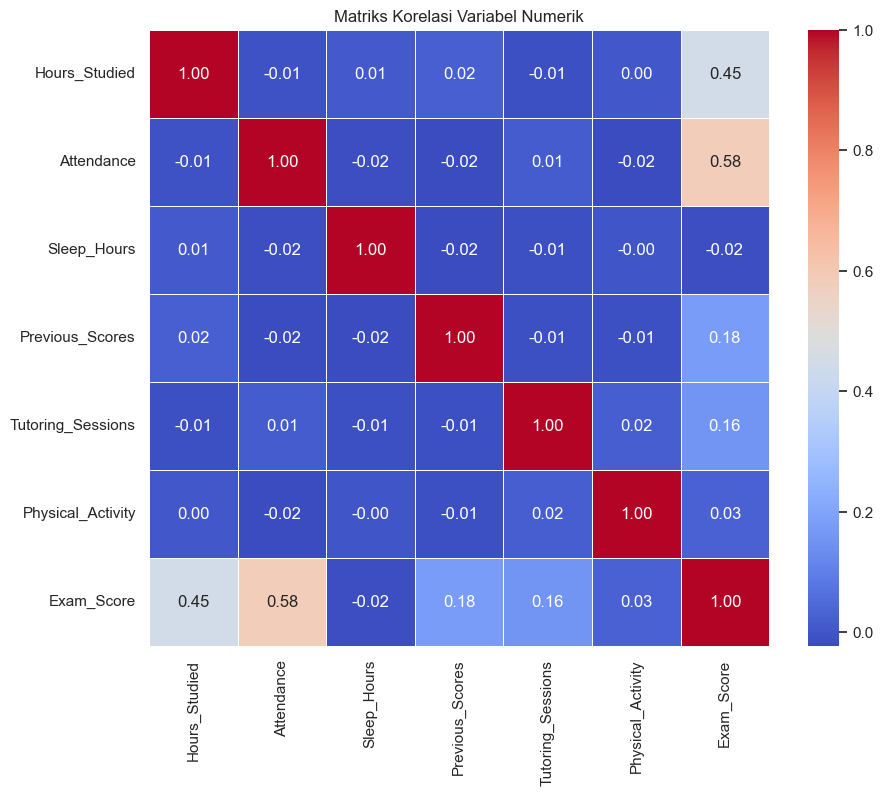

In [320]:
# Memeriksa hubungan antara variabel
# Menghitung matriks korelasi
corr_matrix = clustering_df[numerik_cols].corr()

# Visualisasikan korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

**Analisis Matriks Korelasi :**
1. Hours_Studied dan Exam_Score
   - Korelasi : 0.45
   - Ada hubungan positif antara jam belajar dan nilai ujian, meskipun tidak terlalu kuat. ini berarti semakin banyak siswa belajar, semakin tinggi kemungkinan mereka untuk mendapatkan nilai yang lebih baik.

2. Attendace dan Exam_Score
    - Korelasi : 0.58
    - Kehadiran yang baik berhubungan dengan nilai ujian yang  tinggi. Ini menunjukkan bahwa kehadiran siswa berpengaruh cukup signifikan terhadap performa ujian mereka.
      
3. Previous_Scores dan Exam_Score
    - Korelasi : 0.18
    - Nilai sebelumnya memiliki hubungan lemah dengan nilai ujian saat ini, yang menunjukkan bahwa nilai sebelumnya sedikit berpengaruh meskipun ada faktor lain yang lebih berperan.
      
4. Tutoring_Sessions dan Exam_Score
    - Korelasi : 0.16
    - Menunjukkan bahwa jumlah bimbingan yang diikuti tidak terlalu mempengaruhi nilai ujian siswa.
      
5.  Physical_Activity dan Exam_Score
    - Korelasi : 0.03
    - Tidak ada hubungan signifikan antara aktivitas fisik dan nilai ujian, ini menunjukkan bahwa aktivitas fisik tidak terlalu berpengaruh pada performa ujian.

### **4. Visualisasi Data**

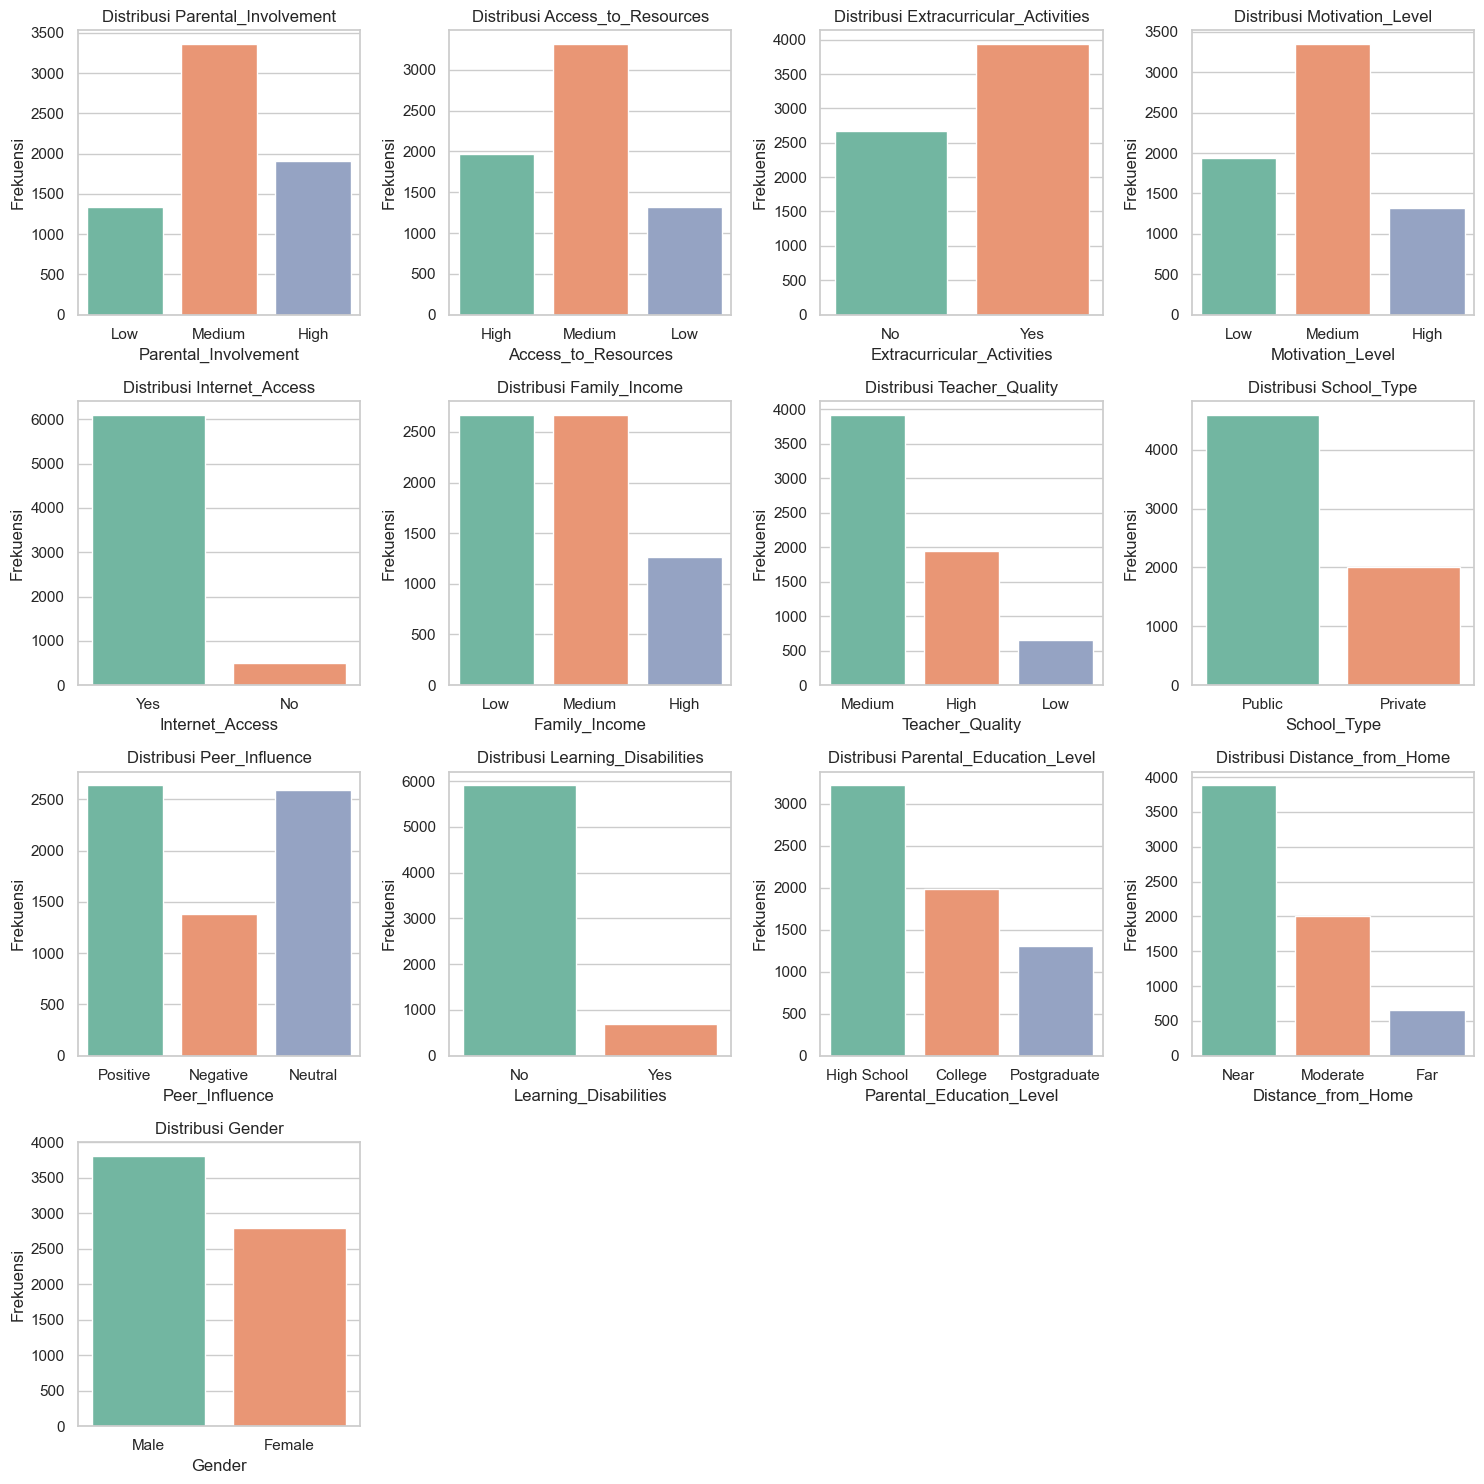

In [321]:
# Daftar variabel kategorikal
kategorikal_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
                    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 
                    'Distance_from_Home', 'Gender']

# Set ukuran figure
plt.figure(figsize=(15, 15))

# Loop untuk membuat count plot untuk setiap kolom kategorikal
for i, col in enumerate(kategorikal_cols, 1):
    plt.subplot(4, 4, i)  # Grid layout untuk plot
    sns.countplot(data=clustering_df, x=col, hue=col, palette='Set2', legend=False)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


Visualisasi diatas menggambarkan distribusi frekuensi dalam variabel kategorikal, berikut analisis berdasarkan visualisasi ini:
- Parental Invovement<br>
Sebagian besar responden terlibat dalam kategori Low dan Medium, dengan sedikit berada di kategori High. ini menunjukkan bahwa banyak orang tua yang mungkin kurang terlibat secara aktif dalam pendidikan anak-anak mereka. Untuk yang medium, orang tua bisa dikatakan aktif namun tidak terlalu fokus dalam memperhatikan pendidikan anak-anak mereka.

- Access to Resources <br>
Banyak responden memiliki akses ke sumber daya dalam kategori High dan Medium, ini berarti sebagian besar siswa atau keluarga memiliki akses ke berbagai sumber daya yang mendukung pendidikan.

- Family Income <br>
Sebagian besar keluarga memiliki pendapatan dalam kategori Low dan Medium, dengan sedikit berada pada kategori High. ini menunjukkan ketimpangan pendapatan di antara keluarga siswa.

- Peer Influence <br>
Responden lebih banyak merasakan Netral dan Positive pengaruh dari teman sebaya, yang berarti tidak banyak teman sebaya responden yang membawa pengaruh negatif.

- Teacher Quality <br>
Mayoritas guru dianggap memiliki medium dan high kualitas, menunjukkan bahwa sebagian besar siswa merasa bahwa pengajaran mereka cukup baik.

- Motivation Level <br>
Sebagian besar siswa berada dalam kategori Medium untuk tingkat motivasi, dengan beberapa yang snagat termotivasi (kategori High), tetapi masih banyak juga yang kurang termotivasi (Low)

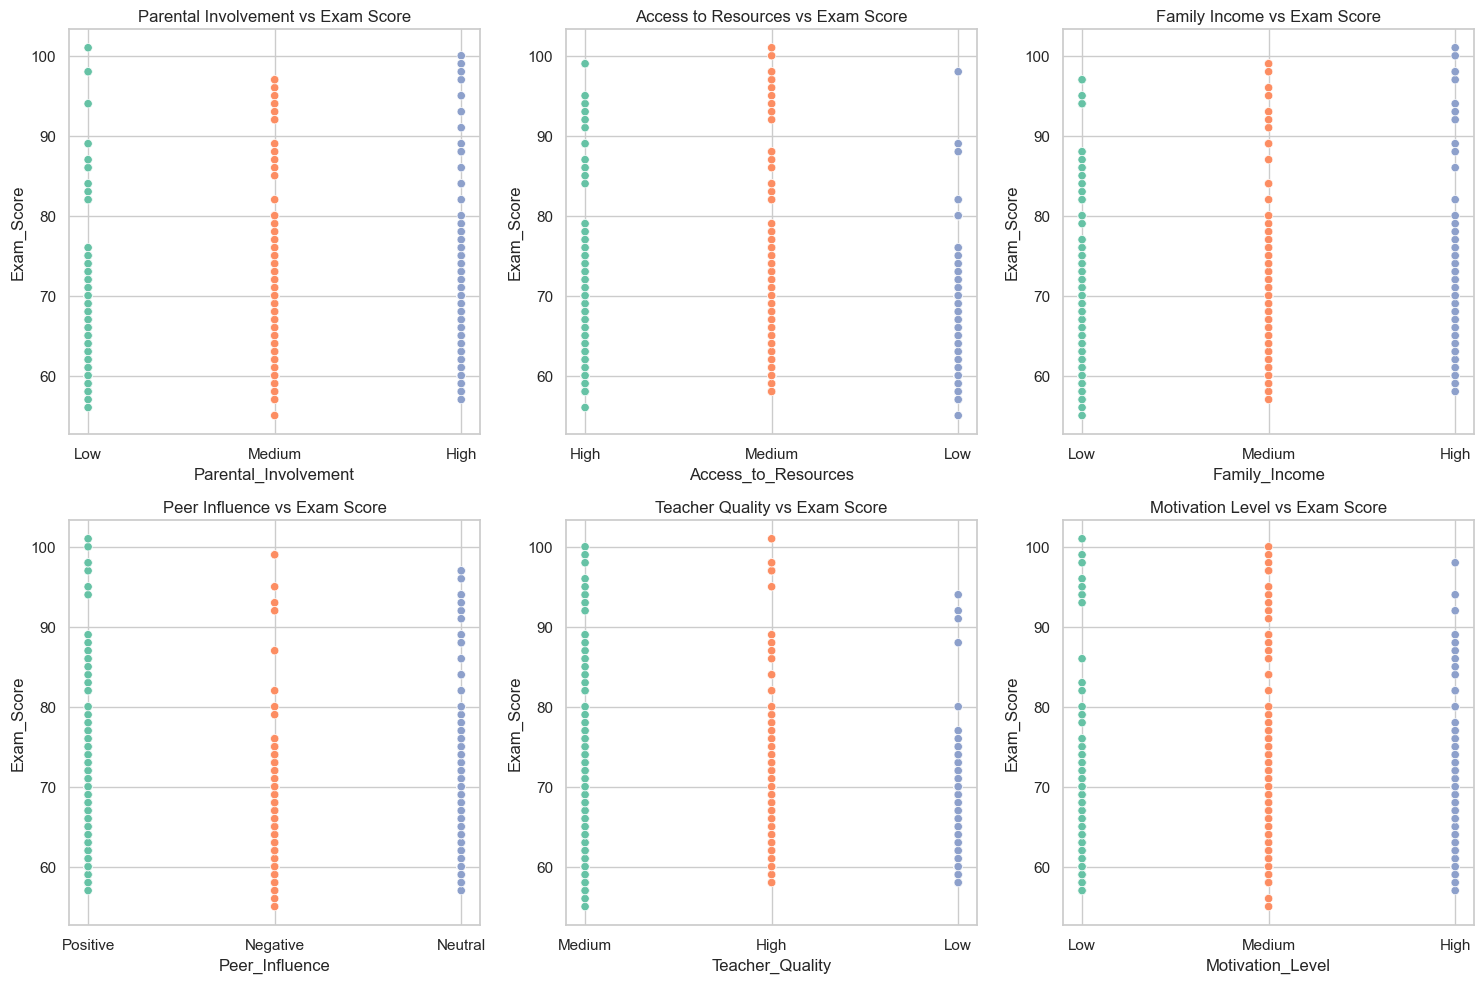

In [322]:
plt.figure(figsize=(15, 10))

# 1. Parental Involvement vs Exam Score
plt.subplot(2, 3, 1)
sns.scatterplot(x='Parental_Involvement', y='Exam_Score', data=clustering_df, hue='Parental_Involvement', palette='Set2', legend=False )
plt.title('Parental Involvement vs Exam Score')

# 2. Access to Resources vs Exam Score
plt.subplot(2, 3, 2)
sns.scatterplot(x='Access_to_Resources', y='Exam_Score', data=clustering_df, hue='Access_to_Resources', palette='Set2', legend=False)
plt.title('Access to Resources vs Exam Score')

# 3. Family Income vs Exam Score
plt.subplot(2, 3, 3)
sns.scatterplot(x='Family_Income', y='Exam_Score', data=clustering_df, hue='Family_Income', palette='Set2', legend=False)
plt.title('Family Income vs Exam Score')

# 4. Peer Influence vs Exam Score
plt.subplot(2, 3, 4)
sns.scatterplot(x='Peer_Influence', y='Exam_Score', data=clustering_df, hue='Peer_Influence', palette='Set2', legend=False)
plt.title('Peer Influence vs Exam Score')

# 5. Teacher Quality vs Exam Score
plt.subplot(2, 3, 5)
sns.scatterplot(x='Teacher_Quality', y='Exam_Score', data=clustering_df, hue='Teacher_Quality', palette='Set2', legend=False)
plt.title('Teacher Quality vs Exam Score')

# 6. Motivation Level vs Exam Score
plt.subplot(2, 3, 6)
sns.scatterplot(x='Motivation_Level', y='Exam_Score', data=clustering_df, hue='Motivation_Level', palette='Set2', legend=False)
plt.title('Motivation Level vs Exam Score')

plt.tight_layout()
plt.show()


#### **Kesimpulan :**
- Parental Involvement, Access to Resources, dan Family Income dan Motivation Level semuanya menunjukkan pengaruh yang positif dan signifikan terhadap Exam Score, dengan kategori High dari ketiga variabel tersebut cenderung berhubungan dengan skor ujian yang lebih tinggi. Meskipun demikian, ada beberapa outliers di setiap kategori, yang menunjukkan bahwa faktor lain juga mempengaruhi Exam Score.
- Teacher Quality juga merupakan faktor penting yang sangat mempengaruhi skor ujian siswa,Siswa dengan kualitas pengajaran tinggi (kategori High) memiliki skor ujian yang lebih konsisten dan lebih tinggi. Sebagian besar siswa dalam kategori ini memiliki skor ujian di atas 80, dengan banyak yang mencapai nilai hampir 100, menunjukkan bahwa kualitas pengajaran yang lebih baik sangat berpengaruh positif terhadap Exam Score.
- Peer Influence memiliki pengaruh yang lebih kecil, ini artinya pergaulan atau pengaruh teman sebaya pada siswa tidak terlalu signifikan dalam menentukan hasil ujian mereka. Dalam hal ini, pengaruh negatif dari teman sebaya tidak tampak mempengaruhi hasil ujian siswa secara signifikan. Namun, pengaruh positif dari teman sebaya juga tidak menunjukkan variasi yang terlalu besar dalam skor ujian.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [323]:
#Type your code here

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [324]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [325]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [326]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [327]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [328]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [329]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [330]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.